In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'crop-recommendation-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1046158%2F1760012%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240214%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240214T073006Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5d32e77bd6da6bc9f691da3c4669957e6d0e8667096be0803f4b2c183b4d1aaf96be9c683cdd4edf593d64be7498b06aa85f5d6d4aad8ddbc435bf55fc163bed6ded58af671210909426c2faf53206f93e25f5ddd3abb01685d7985c2af6925a4c75ed7a79c2246c8fe4fd59882443fd8c2d83d484935c097283d645521607583559de029456967259bab60a10acfa13eaf492092496bfb9738a32b526bab4070e8deafe3e153e7020e6ffa6f360aa1da2dcd7b3e949b449e082e9be1128d9ecca7d9dccc62f9e078f9a0a0521093a3fa3d4ecc973e0dc3b81d3bc713ba00523c5840434df57ff1470f40c4fb9e9297c15578d5945bf8b47e79a068bd9cba6ea'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 65234 bytes downloaded
Downloaded and uncompressed: crop-recommendation-dataset
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv


In [3]:
# Import required libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_columns", None)
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv")

df.shape

(2200, 8)

In [5]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
df["label"].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [7]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

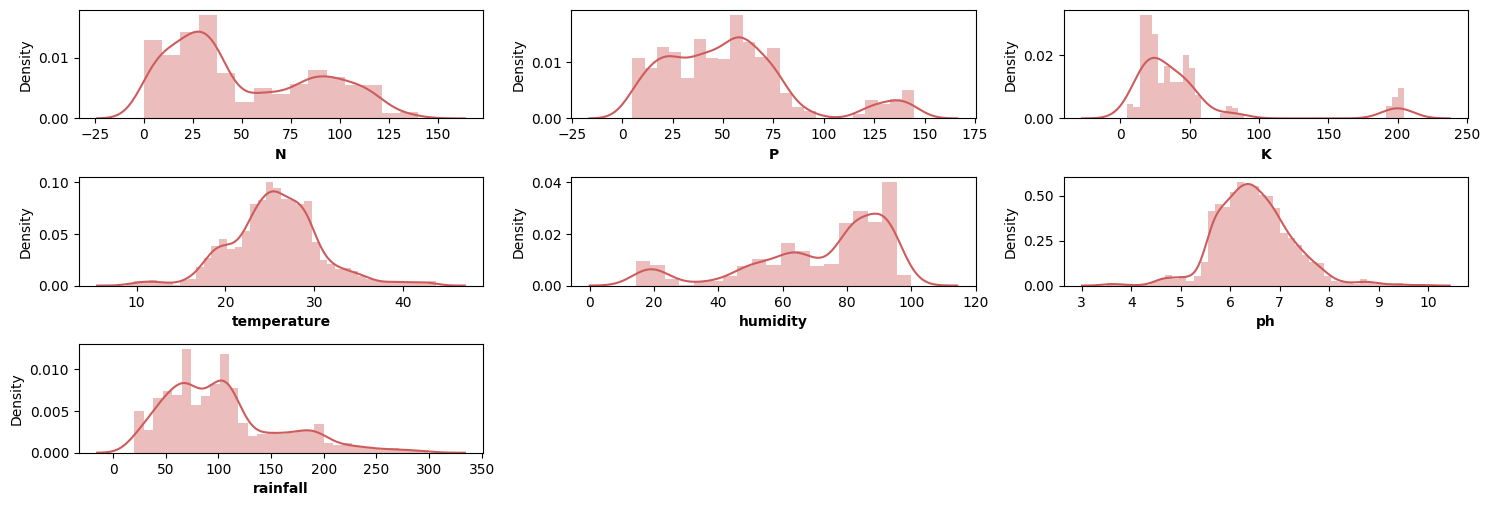

In [9]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

plt.figure(figsize=(15, 100))
for i, col in enumerate(numeric_features):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=df[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

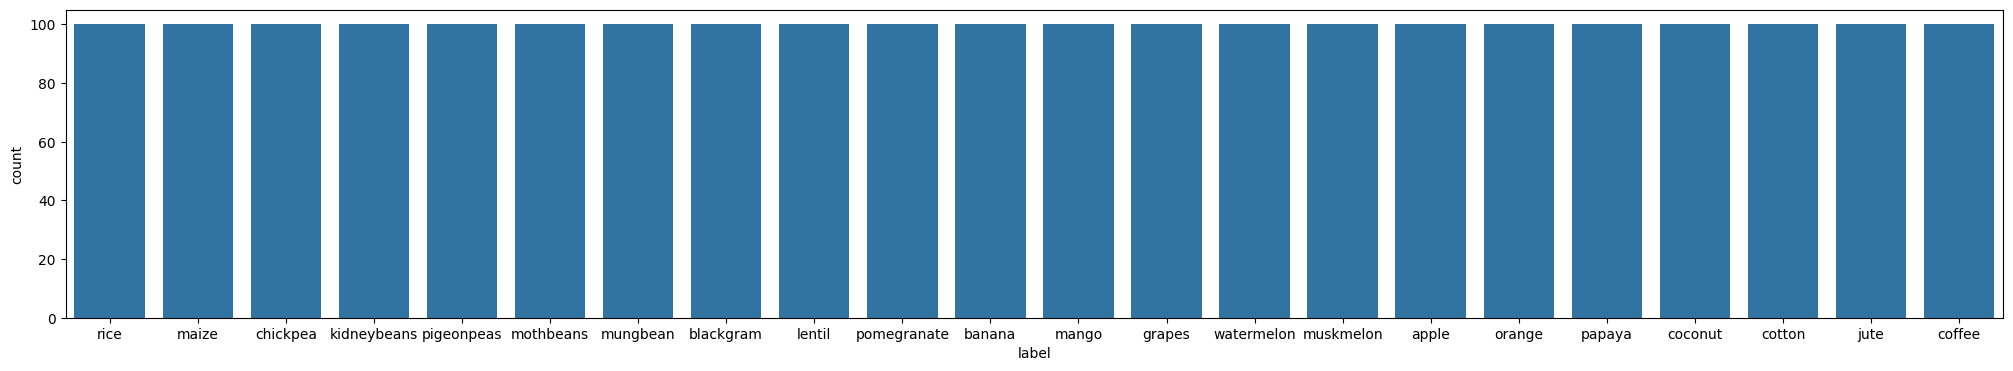

In [10]:
plt.figure(figsize=(25, 4))
sns.countplot(x=df["label"])
plt.show();

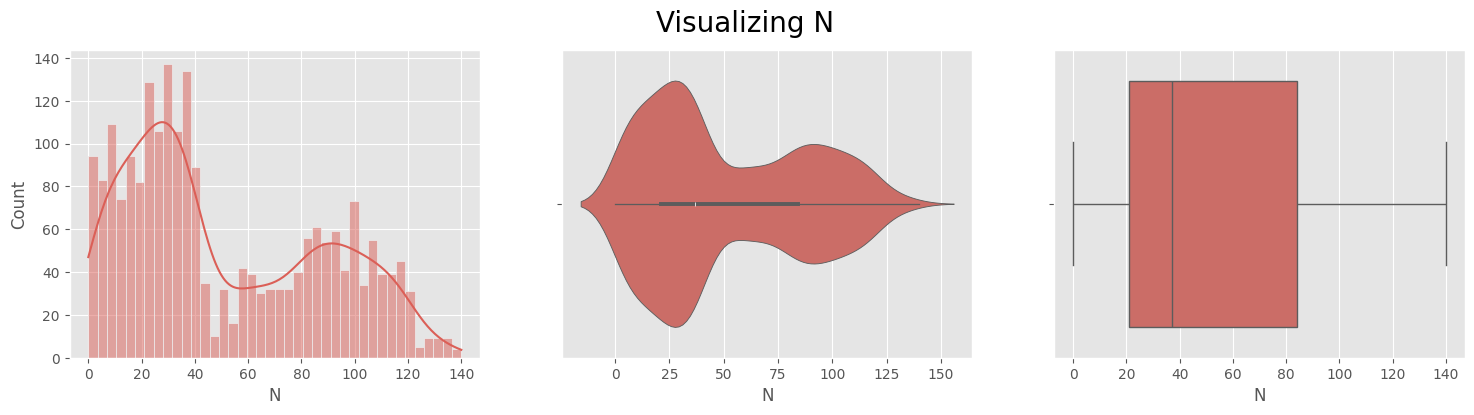

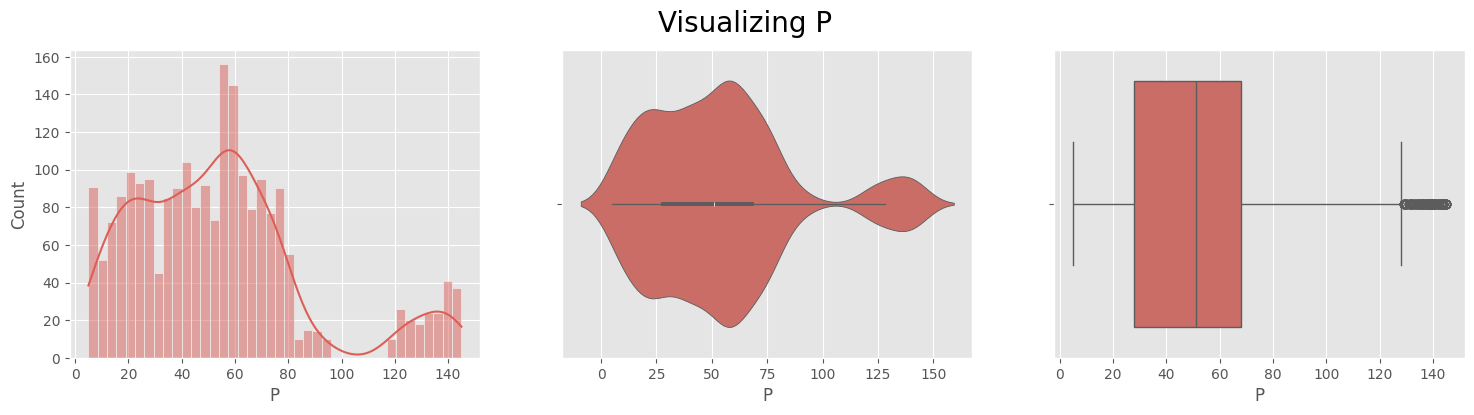

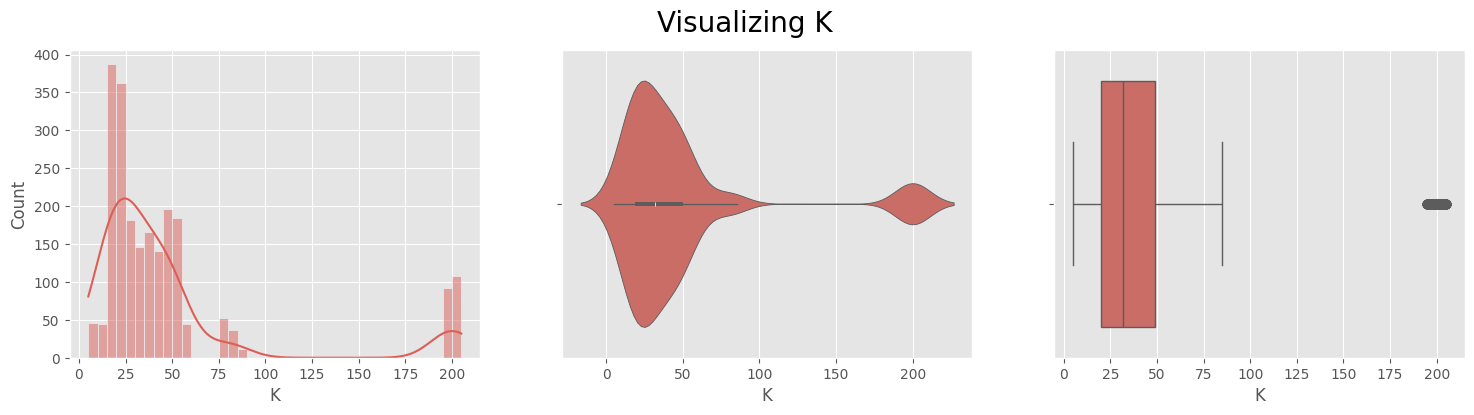

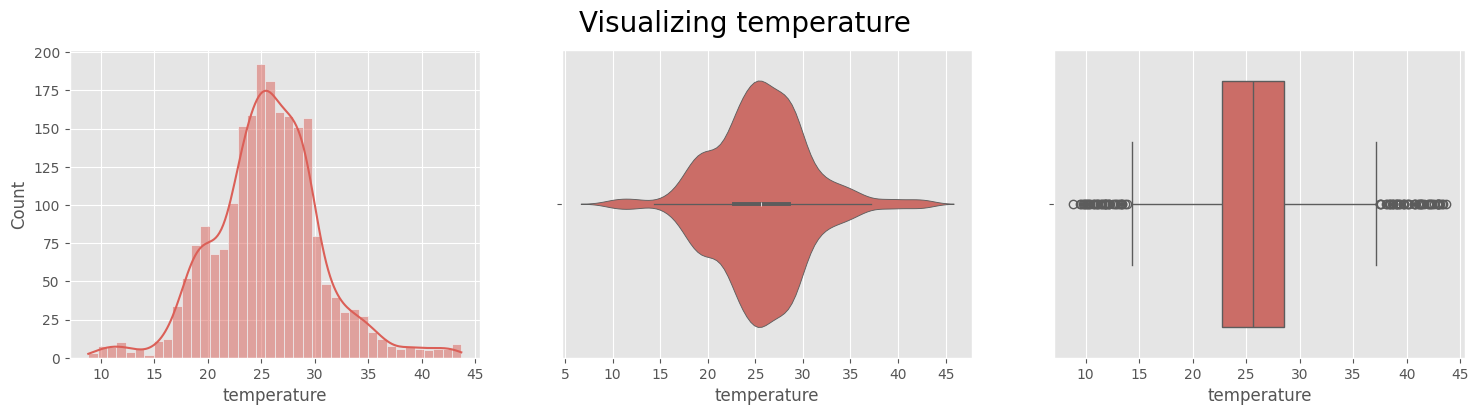

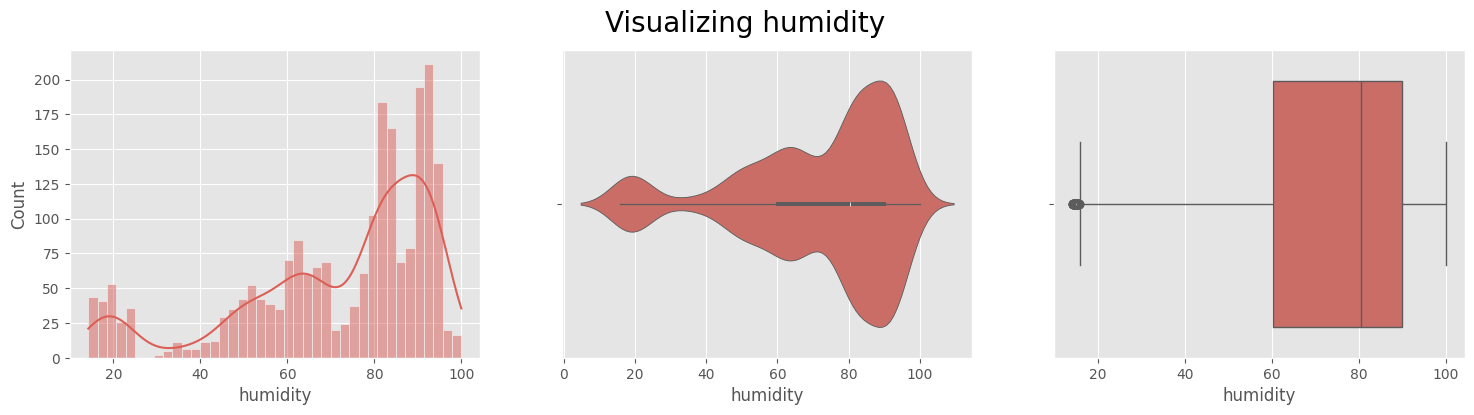

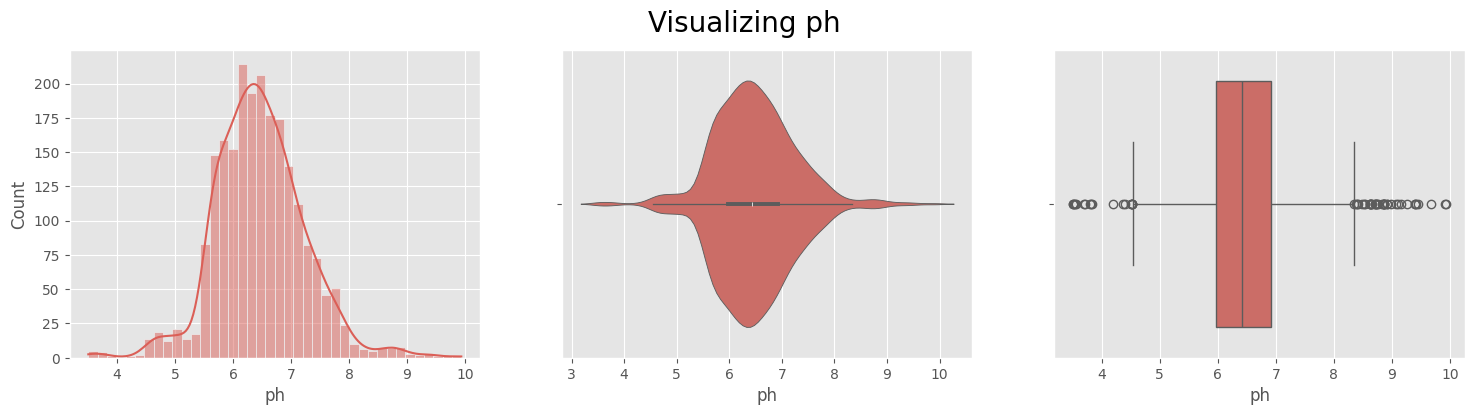

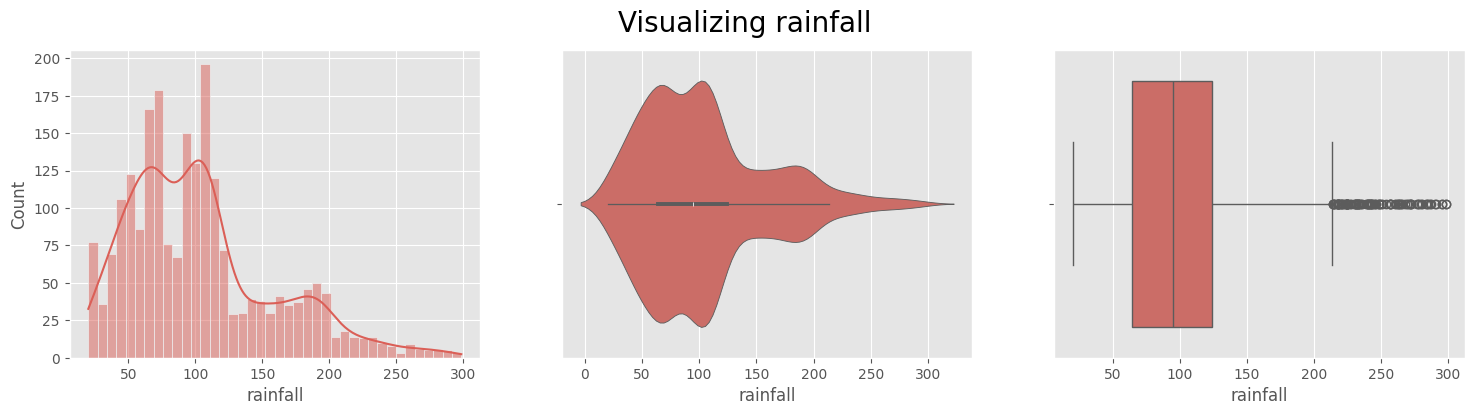

In [11]:
plt.style.use('ggplot')
sns.set_palette("hls", 8)
for i in df.columns[:-1]:
    fig,ax=plt.subplots(1,3,figsize=(18,4))
    sns.histplot(data=df,x=i,kde=True,bins=40,ax=ax[0])
    sns.violinplot(data=df,x=i,ax=ax[1])
    sns.boxplot(data=df,x=i,ax=ax[2])
    plt.suptitle(f'Visualizing {i}',size=20)

In [12]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [13]:
df_grouped = df.groupby('label').mean().reset_index()
df_grouped

,label,N,P,K,temperature,humidity,ph,rainfall
0,apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
1,banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
2,blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
3,chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
4,coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
5,coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
6,cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
7,grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
8,jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798
9,kidneybeans,20.75,67.54,20.05,20.115085,21.605357,5.749411,105.919778


In [14]:
for i in df_grouped.columns[1:]:
    print(f'-------------------------------')
    print(f'Top 5 Most {i} requiring crops:')
    print(f'--------------------------------')
    for j ,k in df_grouped.sort_values(by=i,ascending=False)[:5][['label',i]].values:
        print(f'{j} --> {k}')


-------------------------------
Top 5 Most N requiring crops:
--------------------------------
cotton --> 117.77
coffee --> 101.2
muskmelon --> 100.32
banana --> 100.23
watermelon --> 99.42
-------------------------------
Top 5 Most P requiring crops:
--------------------------------
apple --> 134.22
grapes --> 132.53
banana --> 82.01
lentil --> 68.36
chickpea --> 67.79
-------------------------------
Top 5 Most K requiring crops:
--------------------------------
grapes --> 200.11
apple --> 199.89
chickpea --> 79.92
watermelon --> 50.22
muskmelon --> 50.08
-------------------------------
Top 5 Most temperature requiring crops:
--------------------------------
papaya --> 33.7238587388
mango --> 31.2087701513
blackgram --> 29.9733396789
muskmelon --> 28.663065756
mungbean --> 28.5257747353
-------------------------------
Top 5 Most humidity requiring crops:
--------------------------------
coconut --> 94.84427180610001
papaya --> 92.4033876826
muskmelon --> 92.34280196089999
apple --> 92

In [ ]:
for i in df_grouped.columns[1:]:
    print(f'-------------------------------')
    print(f'Top 5 Least {i} requiring crops:')
    print(f'--------------------------------')
    for j ,k in df_grouped.sort_values(by=i,ascending=True)[:5][['label',i]].values:
        print(f'{j} --> {k}')

In [ ]:
df.head()

In [ ]:
plt.figure(figsize=(8,4))
sns.heatmap(df.drop('label', axis=1).corr(), annot=True)
plt.show()

In [ ]:
df.head()

In [ ]:
df = df.copy(deep=True)

df.head(2)

In [ ]:
X = df.drop(columns=['label'], axis=1)
y = df['label']

In [ ]:
X.head()

In [ ]:
y

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit the label encoder to your categorical labels (y) and transform them
y_encoded = label_encoder.fit_transform(y)

## Split the dataset

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=12)

## Scale the dataset

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)

X_train=pd.DataFrame(X_train,columns=X.columns)

X_test=scaler.transform(X_test)

X_train.head()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

acc = accuracy_score(y_test, y_pred)
p_score = precision_score(y_test, y_pred, average="weighted")


print("Accuracy Score: ", acc)
print("Precision Score: ", p_score)

In [ ]:
def evaluate_model(true, predicted):
    acc = accuracy_score(true, predicted)
    p_score = precision_score(true, predicted)

    return acc, p_score

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, classification_report, roc_auc_score
from sklearn.pipeline import Pipeline

def fit_classification_models(X, y, test_size=0.2, random_state=42):
    """
    Fit classification models using XGBoost, RandomForest, and ExtraTrees classifiers.

    Parameters:
    -----------
    X : array-like of shape (n_samples, n_features)
        The input data.

    y : array-like of shape (n_samples,)
        The target variable.

    test_size : float, default=0.2
        The proportion of the dataset to include in the test split.

    random_state : int, default=42
        Controls the randomness of the dataset splitting.

    Returns:
    --------
    results : dict
        A dictionary containing the performance metrics for XGBoost, RandomForest, and ExtraTrees classifiers.
    """
    # Create an instance of LabelEncoder
    label_encoder = LabelEncoder()

    # Fit the label encoder to your categorical labels (y) and transform them
    y = label_encoder.fit_transform(y)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Create pipelines for XGBoost, RandomForest, and ExtraTrees classifiers
    pipelines = {
        'XGBoost': Pipeline([('scaler', StandardScaler()), ('classifier', XGBClassifier())]),
        'Random Forest': Pipeline([('scaler', StandardScaler()), ('classifier', RandomForestClassifier())]),
        'ExtraTreesClassifier':  Pipeline([('scaler', StandardScaler()), ('classifier', ExtraTreesClassifier())]),
    }

    # Fit and evaluate XGBoost, RandomForest, and ExtraTrees classifiers
    results = {}

    for classifier_name, pipeline in pipelines.items():
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        score = accuracy_score(y_test, y_pred)
        p_score = precision_score(y_test, y_pred, average="weighted")
        results[classifier_name] = {'Accuracy': score, 'Precision': p_score}

    return results


In [ ]:
results = fit_classification_models(X_train, y_train)

In [ ]:
# Create a DataFrame from the results
df = pd.DataFrame(results).transpose()

# Sort the DataFrame by the F1-score in descending order
df_sorted = df.sort_values(by='Precision', ascending=False)

# Display the sorted DataFrame
df_sorted

In [ ]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, accuracy_score

def rf_objective(trial):
    # Use the trial object to suggest values for the RandomForestClassifier hyperparameters
    n_estimators = trial.suggest_int("n_estimators", 100, 500, step=100)
    max_depth = trial.suggest_int("max_depth", 5, 15)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)

    # Define the model with the suggested hyperparameters
    rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)

    # Calculate the score with 10-fold cross-validation, using accuracy as the scoring metric
    # You can replace accuracy with other classification metrics as needed
    scoring = make_scorer(accuracy_score)
    scores = cross_val_score(rf, X, y,
                             cv=KFold(n_splits=10, shuffle=True, random_state=42),
                             scoring=scoring)

    # Return the mean of 10 scores
    return scores.mean()

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Create Study object
study = optuna.create_study(direction="maximize")

# Optimize the study, use more trials to obtain a better result, use fewer trials to be more cost-efficient
study.optimize(rf_objective, n_trials=10)  # Use more trials for better results

# Print the result
best_params = study.best_params
best_score = study.best_value
print(f"Best score: {best_score}\n")
print(f"Optimized parameters: {best_params}\n")

In [ ]:
rfmodel = RandomForestClassifier(
        max_depth=13,
        min_samples_split=6,
        n_estimators=300,
        n_jobs=-1)

rfmodel.fit(X_train, y_train)

In [ ]:
y_preds = rfmodel.predict(X_test)

In [ ]:
print("Score of the model is: ", accuracy_score(y_test, y_preds))
print("Precision of the model is: ", precision_score(y_test, y_preds, average='weighted'))

In [ ]:
## Save the model

import joblib

joblib.dump(rfmodel, 'crop_model.joblib', compress=8)